# The wave equation
The wave equation describes motion of a string.
![string.png](string.png)
The wave equation derives from Newton's law and Hook's law
$$
\begin{eqnarray}
\rho u_{tt}(x,t) & = & \sigma_x(x,t) + f(x,t), \label{eq:1} \\
\sigma(x,t)           & = & \kappa u_x (x,t)
            \label{eq:2}
\end{eqnarray}
$$
Here $u(x,t)$ is the displacement (from equilibrium) of the string
and $\sigma$ is the stress (force per length unit) in the string.
$\kappa(x)$ is the stiffness and $\rho$ is the density.
$f(x,t)$ is a driving force (source).

Differentiating the second equation above  with respect to $x$ and inserting into
the first equation we get
\begin{eqnarray}
  \frac{\rho}{\kappa} u_{tt} = u_{xx} + \frac{f}{\kappa}.
\end{eqnarray}
Where we assume that $\rho$ is constant. The
wave velocity is given by $c^{-2} = \rho/\kappa$, so we have
\begin{eqnarray}
  c^{-2}(x) u_{tt}(x,t) = u_{xx}(x,t) + s(x,t).
\end{eqnarray}
where $s(x,t) = \frac{f(x,t)}{\kappa}$.

## Numerical Grid
We create a grid out of the $x$ and $t$ coordinates as follows
\begin{eqnarray}
  x_i & = & i\Delta x = i h, \, i=1,\cdots,n\\
  t_j & = & j\Delta t = j k, \, j=1,\cdots,m.
\end{eqnarray}
We want to compute an approximate solution, $u_{i,j}$ to the true solution
$u(x_i,t_j)$ for all gridpoints in the grid.

![grid.png](grid.png)

## Finite Difference Solution
The second order derivatives are approximated with a central difference
\begin{eqnarray}
\frac{u_{i,j+1} -2 u_{i,j} + u_{i,j-1}}{k^2} =
c^2_i\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} + s_{i,j}
\end{eqnarray}
This is equal to
\begin{eqnarray}
u_{i,j+1} -2 u_{i,j} + u_{i,j-1} =
\frac{k^2c^2_i}{h^2}(u_{i+1,j} - 2u_{i,j} + u_{i-1,j}) + s_{i,j}k^2
\end{eqnarray}
Introduce $r^2_i = \left(\frac{kc_i}{h}\right)^2$ to get
\begin{eqnarray}
u_{i,j+1} -2 u_{i,j} + u_{i,j-1} =
r^2_i(u_{i+1},j - 2u_{i,j} + u_{i-1,j}) + s_{i,j} k^2
                                        \label{eq:diff}
\end{eqnarray}

which is solved by
\begin{eqnarray}
u_{i,j+1} = 2 u_{i,j} - u_{i,j-1}
+r^2_i(u_{i+1},j - 2u_{i,j} + u_{i-1,j}) + s_{i,j} k^2
                                        \label{eq:sol}
\end{eqnarray}

## Stability
Stability condition
\begin{eqnarray}
 r = ck/h \le 1
\end{eqnarray}

If $r=1$ the numerical solution is exact!
An exact solution to the wave equation is a 
plane monochromatic wave with frequency $\omega$ and
wavenumber $k_x$ which are constants.
\begin{eqnarray}
u(x,t) = \exp i(k_x x - \omega t)
\end{eqnarray}
Prove that this is a solution!

We will now find the stability condition by using
the plane wave as a trial solution in the
finite-difference solution.

First, to avoid confusion, we replace $i$ and $j$ in the
finite-difference solution above with indices $m$ (x) and 
$n$ (time). We then have the displacement $u$ as:
    
\begin{eqnarray}
u_{m,n} = \exp i(k_x m h - \omega n k)
\end{eqnarray}

If we insert the above expression for $u$ into the 
finite-difference solution above (changing $i$ to $m$ 
and $j$ to $n$ one gets:
                                  
\begin{eqnarray}
  \exp(-i\omega k )  = 2 -\exp(i\omega k)   
                    + r^2[\exp(ik_x h)- 2 + \exp(-ik_x h)]
\end{eqnarray}
                                  
This can be rearranged to:
\begin{eqnarray}
\exp(-i\omega k) + \exp(i\omega k) = (2-2r^2) 
                                     r^2[\exp(ik_x m h)] + \exp(-ik_x m h)]
\end{eqnarray}
                                  
Since $2\cos(x) = \exp(ix)+\exp(-ix)$

the relation above can be rewritten to
                                  
\begin{eqnarray}
\cos(\omega k) = (1-r^2) + r^2\cos(k_x m h) 
\end{eqnarray}
                
                           
1. For $r=1$ this gives $\omega h = k_x m $ which
       is the so-called dispersion relation for a plane 
       wave, which means that $r=1$ corresponds to the exact solution.
                            
2. For $r < 1$ the finite-difference solution is stable, but not exact.


3. For $r>1$ the finite-difference solution is unstable.
                                  








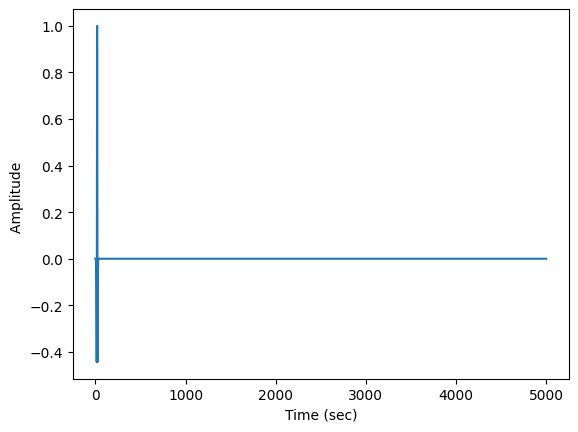

/tmp/ipykernel_36160/3381187148.py:39: RuntimeWarning: overflow encountered in double_scalars
  u[i,j+1] = 2*u[i,j] - u[i,j-1] + r*r*(u[i+1,j]- 2*u[i,j]+u[i-1,j])
/tmp/ipykernel_36160/3381187148.py:39: RuntimeWarning: invalid value encountered in double_scalars
  u[i,j+1] = 2*u[i,j] - u[i,j-1] + r*r*(u[i+1,j]- 2*u[i,j]+u[i-1,j])


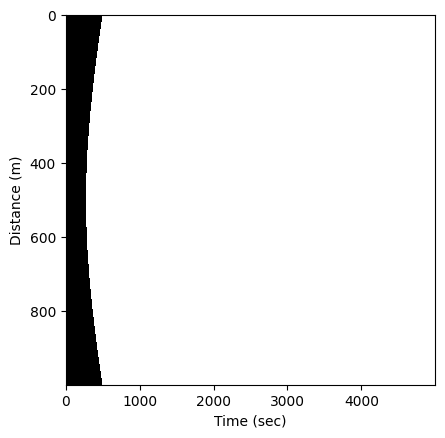

In [3]:
""""Solve 1D elastic equations using displacement"""
import numpy as np
import matplotlib.pyplot as pl
from math import *

#-----------------------------
# functions
#-----------------------------
def ricker(fp,tp,M,dt) :
   s=np.zeros((M))
   for k in range(0,M):
       t=k*dt
       wp=2.0*3.14159*fp
       s[k] =(1-0.5*pow(wp,2)*pow((t-tp),2))*exp(-0.25*pow(wp,2)*pow(t-tp,2))
   return(s)

#------------------------------
# Main script
#-------------------------------
M=5000 #No of timesteps
N=1000 #No of x grdipoints
h=5.0  #Size of each gridcell in the x-direction
k=0.0005 #Size of timesteps
k=0.005 #This value leads to unstability
c=2000.0 #Wave velocity in m/s
r=((k*c)/h) 
spos=N/2
s=ricker(15.0,0.1,M,k)

pl.plot(s)
pl.xlabel("Time (sec)")
pl.ylabel("Amplitude ")
pl.show()

u=np.zeros((N,M))

for j in range(1,M-1):
  for i in range(1,N-1):
    u[i,j+1] = 2*u[i,j] - u[i,j-1] + r*r*(u[i+1,j]- 2*u[i,j]+u[i-1,j])
    if i == spos:
      u[i,j+1] = u[i,j+1]+s[j]*k*k

    
#Set aspect ratio
pl.imshow(u,cmap='gray')
ar=1.0
ax=pl.gca()
asr = 1.0/(ax.get_data_ratio()*ar)
pl.Axes.set_aspect(ax,asr)
pl.ylabel("Distance (m)")
pl.xlabel("Time (sec)")

pl.show()

